Goal: exploring feature reduction on a Face Recognition Dataset

Face classification dataset: http://vis-www.cs.umass.edu/lfw/

- Images of well-known people
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [125]:
# From anaconda: install pillow
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [126]:
n_samples, height, width = lfw.images.shape
print('number of images', n_samples)
print('height (pixels)', height)
print('width (pixels)', width)

number of images 1288
height (pixels) 50
width (pixels) 37


In [127]:
print('labels', lfw.target_names)

print('y', lfw.target.shape, lfw.target)

print('X', lfw.data.shape, lfw.data)

labels ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
y (1288,) [5 6 3 ... 5 3 5]
X (1288, 1850) [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


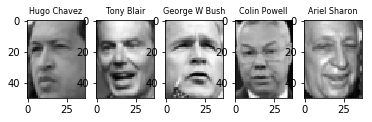

In [128]:
%matplotlib inline
# plot images to see dataset

import matplotlib.pyplot as plt
num = 5

images = lfw.data[:5] # first 5 images (X)
targets = lfw.target[:5] # first 5 targets (y)

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

# for i in range(num):
#   axes[i].imshow(images[i])
#

for image, target, ax in zip(images, targets, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)
    ax.set_title(lfw.target_names[target], size=8)

plt.show()

In [129]:
# PCA to map X to Z for training

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = lfw.data
y = lfw.target

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit using training set
pca = PCA(n_components=150)
pca.fit(X_train) # compute eigenvectors / eigenvalues

eigenfaces = pca.components_
eigenfaces
# transform train and test


array([[-0.00685218, -0.00752695, -0.00918909, ..., -0.01433781,
        -0.01294186, -0.01188288],
       [ 0.02304086,  0.0215521 ,  0.02275386, ..., -0.04400194,
        -0.04318586, -0.0422613 ],
       [ 0.02187865,  0.02016278,  0.01900914, ...,  0.05723406,
         0.05080717,  0.04725159],
       ...,
       [ 0.01359233, -0.00381416,  0.00070629, ...,  0.03684138,
        -0.01823024, -0.09607237],
       [-0.12425993, -0.02743512,  0.05067391, ..., -0.04860373,
        -0.0187612 , -0.0349691 ],
       [-0.00055968,  0.01539471,  0.02646795, ...,  0.034088  ,
         0.0303774 , -0.00231864]], dtype=float32)

In [130]:
eigenfaces.shape

(150, 1850)

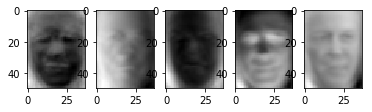

In [131]:
# plot the faces (eigenvectors)
eigenfaces = pca.components_

num = 5

# note: last 5, do eigenfaces[-num:]
images = eigenfaces[:num] # first 5 eigenvectors

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)

plt.show()

In [132]:
temp = eigenfaces[0].reshape(height, width)
temp[25:40, 10:25] # row, column

array([[-0.02487828, -0.02467445, -0.02452631, -0.02305418, -0.02087049,
        -0.02029108, -0.02008203, -0.01951727, -0.0193269 , -0.01960985,
        -0.02018774, -0.02067437, -0.02173945, -0.0238347 , -0.02586981],
       [-0.02583156, -0.02527116, -0.02474282, -0.0228817 , -0.02134041,
        -0.02115589, -0.0207752 , -0.01987745, -0.02043602, -0.02101301,
        -0.02133687, -0.02185677, -0.02279211, -0.02458042, -0.02685453],
       [-0.02662871, -0.02633291, -0.02522712, -0.02341745, -0.02306832,
        -0.0231805 , -0.02206359, -0.02122841, -0.02214613, -0.02268803,
        -0.02309144, -0.02405547, -0.02497943, -0.02571435, -0.02744391],
       [-0.02757872, -0.02735885, -0.02589593, -0.02442687, -0.02438707,
        -0.02459555, -0.02407889, -0.02404671, -0.024931  , -0.02554791,
        -0.02625502, -0.02642297, -0.02682359, -0.02629855, -0.02721147],
       [-0.02740664, -0.02697657, -0.0263904 , -0.02641596, -0.02634615,
        -0.02602526, -0.02650302, -0.02781517, 

In [133]:
print(pca.explained_variance_)

[501418.4    391794.7    183592.9    154257.16   133670.61    74828.65
  65169.77    56409.11    52337.773   49298.76    43599.18    40965.59
  31706.832   28196.879   27588.162   25390.406   23128.975   22155.65
  21659.766   18729.12    18053.518   16946.486   16575.91    14548.059
  13765.097   13481.163   13152.352   12549.605   11496.801   10829.204
  10203.935    9893.546    9228.305    9102.338    8670.934    8551.063
   8154.3945   7677.286    7519.664    7379.3735   7257.08     6934.442
   6736.0493   6697.161    6244.079    6194.189    6101.1265   5768.958
   5637.305    5612.906    5418.4644   5324.1763   5194.466    5116.0474
   5023.6377   4892.3296   4669.67     4636.62     4530.9214   4485.1665
   4293.1895   4223.231    4079.6963   3976.5344   3886.7585   3816.7058
   3730.3745   3677.2551   3620.642    3580.47     3473.105    3451.4226
   3338.5303   3255.1199   3220.215    3158.4187   3134.707    3066.2217
   2982.8481   2946.246    2918.9963   2892.9036   2835.3735  

In [134]:
print(pca.explained_variance_ratio_)

[0.19346525 0.15116848 0.07083675 0.05951796 0.05157493 0.02887158
 0.02514484 0.02176466 0.02019379 0.01902124 0.01682213 0.015806
 0.01223364 0.01087937 0.0106445  0.00979653 0.00892399 0.00854845
 0.00835712 0.00722637 0.0069657  0.00653856 0.00639558 0.00561316
 0.00531107 0.00520152 0.00507465 0.00484209 0.00443588 0.0041783
 0.00393705 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134005 0.00133168
 0.00128813 0.00125594 0.00124247 0.00121863 0.00120948 0.00118306
 0.00115089 0.00113677 0.00112625 0.00111619 0.00109399 0.00107178
 0.0010567  0.00104361 0.00102393 0.00101691 0.00099774 0.0009637

In [135]:
# eigenvalues-equivalent (explained_variance)
# print(pca.explained_variance_)

import numpy as np
# 95.7% of the variance is captured by projecting from 1850 to 150 features 
print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.9567568
[0.19346525 0.15116848 0.07083675 0.05951796 0.05157493 0.02887158
 0.02514484 0.02176466 0.02019379 0.01902124 0.01682213 0.015806
 0.01223364 0.01087937 0.0106445  0.00979653 0.00892399 0.00854845
 0.00835712 0.00722637 0.0069657  0.00653856 0.00639558 0.00561316
 0.00531107 0.00520152 0.00507465 0.00484209 0.00443588 0.0041783
 0.00393705 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290136 0.00284723 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217508 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134005 0.00133168
 0.00128813 0.00125594 0.00124247 0.00121863 0.00120948 0.00118306
 0.00115089 0.00113677 0.00112625 0.00111619 0.00109399 0.00107178
 0.0010567  0.00104361 0.00102393 0.00101691 0.00099774

50 : 0.8630064
100 : 0.9282787
150 : 0.956744
200 : 0.972198
250 : 0.9815205


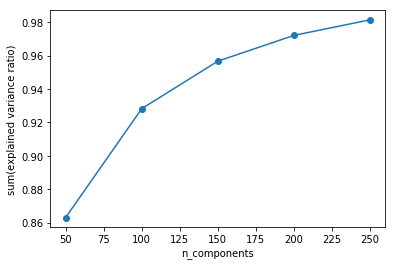

In [136]:
components = range(50, 300, 50)
evrs = []

for n in components:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train) # notice that PCA is unsupervised

    # compute sum of ratios (e.g. 0.95, etc)
    evr = np.sum(pca_temp.explained_variance_ratio_)
    evrs.append(evr)
    print(n, ':', evr)
    
fig, ax = plt.subplots()
ax.plot(components, evrs, marker='o')
ax.set(xlabel='n_components', ylabel='sum(explained variance ratio)')
plt.show()

In [137]:
# plot the transformed "images"
Z_train = pca.transform(X_train) # Z_train = e . X_train'
Z_test = pca.transform(X_test)

print('Train set after PCA', Z_train.shape)
print('Test set after PCA', Z_test.shape)

Train set after PCA (966, 150)
Test set after PCA (322, 150)


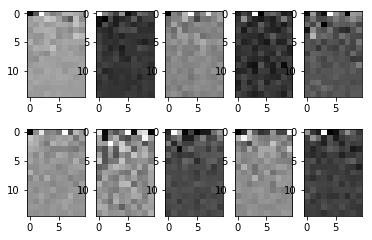

In [138]:
nrows=2
ncols=5

num = nrows * ncols
z_height = 15 # arbitrary (just for plotting)
z_width = 10

images = Z_train[:num] # first 5 transformed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(z_height, z_width), cmap=plt.cm.gray) 
plt.show()

In [148]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE

# Training classifier on the 150 features

# Evaluation metrics

# indices = (y_train == 2) # all rows with label = i

# print(y_train[:10])
# print(indices[:10])
# print(Z_train_2d[:10])
# print("----")
# print(Z_train_2d[indices][:5])

In [149]:
Z_train.shape

(966, 150)

In [ ]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

pca_plot = PCA(n_components=2) # Z will have 2 components

Z_train_2d = pca_plot.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

# plot
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(lfw.target_names)):
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [152]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

Z_train_2d = tsne.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

Before (966, 150)
After (966, 2)


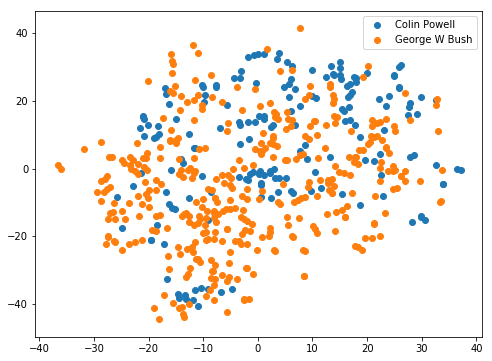

In [153]:
%matplotlib inline
# plot
fig, ax = plt.subplots(figsize=(8, 6))

# to compare any classes, just select the labels
#for i in range(len(lfw.target_names)):
for i in [1, 3]:
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [144]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D # <-- import 3D

tsne = TSNE(n_components=3, random_state=42) # <-- 3 components

Z_train_2d = tsne.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

Before (966, 150)
After (966, 3)


In [ ]:
%matplotlib notebook

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(lfw.target_names)):
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
               Z_train_2d[indices, 2], # <-- 3rd axis
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [156]:
# Scale Z_train and Z_test so that values fall roughly within -2 and 2
# (currently -2000 < Z < 2000)
# Reason: SVM will work better
from sklearn.preprocessing import StandardScaler

# fit
scaler = StandardScaler() # create
scaler.fit(Z_train) # initialize constants from train data

# transform both train and test
Z_train_sc = scaler.transform(Z_train)
Z_test_sc = scaler.transform(Z_test)

# Q: what about y_train, y_test?
# A: for classification, no scaling of labels
# A: for regression, optional scaling if y is big range (so that losses
# can be smaller)

In [157]:
Z_train_sc

array([[-2.0766776 , -1.0463343 ,  2.1280384 , ...,  0.38451406,
        -0.3762712 , -0.51223147],
       [ 1.3217942 ,  0.5931436 ,  0.53443086, ..., -0.23779534,
         0.29894245, -0.75896966],
       [-0.7615862 , -0.01974055, -0.24003184, ..., -0.39813662,
        -0.06561117, -0.8240751 ],
       ...,
       [-0.76070714,  0.04027953, -0.21256316, ..., -0.51403767,
        -1.421664  , -1.2803745 ],
       [-0.26755962,  0.8390747 , -0.22231247, ..., -0.2636761 ,
         0.97083825,  0.7350145 ],
       [-1.3202463 , -1.1272804 ,  0.15624854, ...,  0.5202588 ,
        -0.15889297,  0.74480444]], dtype=float32)

In [67]:
# Training

# 1. SGD + Logistic Regression
# 2. SVM with some non-linear kernel
# 3. Compare evaluation metrics

sgd_clf.score?

In [163]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train_sc, y_train)

# using test set like validation set
scores = sgd_clf.score(Z_test_sc, y_test)
print(scores) # accuracy

-- Epoch 1
Norm: 415.78, NNZs: 150, Bias: -631.918813, T: 966, Avg. loss: 41.729217
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 389.36, NNZs: 150, Bias: -599.807046, T: 1932, Avg. loss: 5.573416
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 321.24, NNZs: 150, Bias: -596.171069, T: 2898, Avg. loss: 0.895487
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 324.75, NNZs: 150, Bias: -564.494955, T: 3864, Avg. loss: 0.964910
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 284.57, NNZs: 150, Bias: -558.883996, T: 4830, Avg. loss: 0.399190
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 537.92, NNZs: 150, Bias: -451.794927, T: 966, Avg. loss: 57.785856
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 465.23, NNZs: 150, Bias: -422.797432, T: 1932, Avg. loss: 16.182777
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 387.10, NNZs: 150, Bias: -404.581329, T: 2898, Avg. loss: 7.858537
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 378.73, NNZs: 150, Bias: -361.

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


In [168]:
from sklearn.svm import SVC

svc = SVC(random_state=42) # TODO: GridSearchCV is best
svc.fit(Z_train_sc, y_train)

scores = svc.score(Z_test_sc, y_test)
print(scores) # accuracy

0.8074534161490683


In [171]:
y_pred_svc = svc.predict(Z_test_sc)
y_pred_sgd = sgd_clf.predict(Z_test_sc)

print('Actual (ground truth)', y_test[:20])
print('---')
print('prediction SVC', y_pred_svc[:20])
print('prediction Logistic Regression', y_pred_sgd[:20])

Actual (ground truth) [3 3 6 3 3 3 4 1 3 3 3 3 3 6 3 3 3 3 3 4]
---
prediction SVC [3 3 6 3 3 3 4 1 3 3 3 3 3 3 3 3 3 3 3 4]
prediction Logistic Regression [3 3 6 3 3 3 4 1 3 3 3 3 3 6 3 3 3 1 3 4]


In [172]:
from sklearn.metrics import confusion_matrix

print('SVC\n', confusion_matrix(y_test, y_pred_svc))

print('Logistic Regression\n', confusion_matrix(y_test, y_pred_sgd))

SVC
 [[  4   2   0   7   0   0   0]
 [  0  52   0   8   0   0   0]
 [  0   0  14  13   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   7  17   0   0]
 [  0   2   0   7   0   6   0]
 [  0   1   0  11   0   0  24]]
Logistic Regression
 [[  5   2   2   3   0   0   1]
 [  2  50   2   5   0   1   0]
 [  0   2  19   6   0   0   0]
 [  0   7   5 129   4   1   0]
 [  0   1   0   4  18   2   0]
 [  0   1   0   2   2   8   2]
 [  0   2   2   2   2   0  28]]


Text(33,0.5,'Actual')

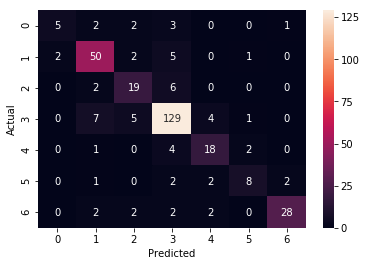

In [176]:
%matplotlib inline
import seaborn as sns

cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax, fmt='d') # fmt='d' integer format
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

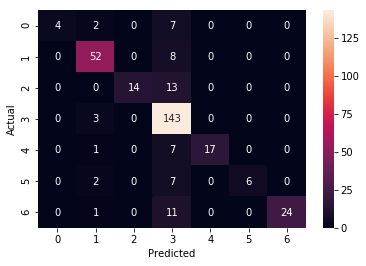

In [177]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d') # fmt='d' prints integers
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [178]:
# precision / recall
from sklearn.metrics import classification_report

# usage: classification_report(y_true, y_pred)
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.71      0.38      0.50        13
          1       0.77      0.83      0.80        60
          2       0.63      0.70      0.67        27
          3       0.85      0.88      0.87       146
          4       0.69      0.72      0.71        25
          5       0.67      0.53      0.59        15
          6       0.90      0.78      0.84        36

avg / total       0.80      0.80      0.79       322

             precision    recall  f1-score   support

          0       1.00      0.31      0.47        13
          1       0.85      0.87      0.86        60
          2       1.00      0.52      0.68        27
          3       0.73      0.98      0.84       146
          4       1.00      0.68      0.81        25
          5       1.00      0.40      0.57        15
          6       1.00      0.67      0.80        36

avg / total       0.85      0.81      0.79       322



In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88)

pca = PCA(n_components=150)
pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

scaler = StandardScaler()
scaler.fit(Z_train)
Z_train_sc = scaler.transform(Z_train)
Z_test_sc = scaler.transform(Z_test)

svc = SVC(random_state=88)
svc.fit(Z_train_sc, y_train)
svc.score(Z_test_sc, y_test)

sgd = SGDClassifier(random_state=88)
sgd.fit(Z_train_sc, y_train)
sgd.score(Z_test_sc, y_test)

y_pred_sgd = sgd.predict(Z_test_sc)
print(classification_report(y_test, y_pred_sgd))

y_pred_svc = svc.predict(Z_test_sc)
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.79      0.68      0.73        22
          1       0.78      0.78      0.78        58
          2       0.64      0.67      0.65        24
          3       0.85      0.89      0.87       132
          4       0.73      0.86      0.79        28
          5       0.85      0.69      0.76        16
          6       0.81      0.71      0.76        42

avg / total       0.80      0.80      0.80       322

             precision    recall  f1-score   support

          0       1.00      0.36      0.53        22
          1       0.88      0.84      0.86        58
          2       0.93      0.58      0.72        24
          3       0.67      0.98      0.80       132
          4       1.00      0.64      0.78        28
          5       1.00      0.56      0.72        16
          6       1.00      0.55      0.71        42

avg / total       0.84      0.78      0.77       322



C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [214]:
SGDClassifier?

In [222]:
# Hyperparameter search for SVC

Cs = [0.001, 0.01, 0.1, 1.0, 10] # error sensitivity
gammas = [0.001, 0.01, 0.1, 1.0, 10] # rbf constant

from sklearn.model_selection import GridSearchCV

# 3-fold cross validation to find best combination of C and gamma
gs = GridSearchCV(SVC(random_state=42),
                  param_grid={'C' : Cs, 'gamma' : gammas},
                  verbose=True)
gs.fit(Z_train_sc, y_train)
print(gs.best_params_)

# print(gs.cv_results_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   27.5s finished


{'C': 10, 'gamma': 0.001}


In [213]:
print(gs.score(Z_test_sc, y_test))

pred_gs = gs.predict(Z_test_sc)

print(classification_report(y_test, pred_gs))

0.8105590062111802
             precision    recall  f1-score   support

          0       0.82      0.64      0.72        22
          1       0.78      0.86      0.82        58
          2       0.68      0.62      0.65        24
          3       0.81      0.94      0.87       132
          4       0.87      0.71      0.78        28
          5       1.00      0.75      0.86        16
          6       0.87      0.62      0.72        42

avg / total       0.82      0.81      0.81       322



In [218]:
GridSearchCV?

In [221]:
# Hyperparameter search for SGD Logistic Regression

learning_rate = ['optimal', 'constant', 'invscaling'] # learning rate schedule
eta0 = [0.001, 0.01, 0.1, 1.0, 10] # learning rate initial value

# 3-fold cross validation to find best combination of parameters
gs_sgd = GridSearchCV(SGDClassifier(random_state=88),
                      param_grid={'learning_rate' : learning_rate,
                                  'eta0' : eta0})
gs_sgd.fit(Z_train_sc, y_train)
print(gs_sgd.best_params_)
# print(gs.cv_results_)

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default to

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default to

{'eta0': 0.001, 'learning_rate': 'constant'}


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default to

In [217]:
print(gs_sgd.score(Z_test_sc, y_test))

pred_gs_sgd = gs_sgd.predict(Z_test_sc)

print(classification_report(y_test, pred_gs_sgd))

0.8136645962732919
             precision    recall  f1-score   support

          0       0.87      0.59      0.70        22
          1       0.79      0.84      0.82        58
          2       0.65      0.71      0.68        24
          3       0.82      0.92      0.87       132
          4       0.81      0.79      0.80        28
          5       0.90      0.56      0.69        16
          6       0.91      0.71      0.80        42

avg / total       0.82      0.81      0.81       322



In [204]:
# Plot decision boundaries for the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88)

# PCA: 1850 -> 150 dimesions
pca = PCA(n_components=150)
pca.fit(X_train)
Z_train = pca.transform(X_train)

# 2D PCA to plot boundaries
pca_plot = PCA(n_components=2)
pca_plot.fit(Z_train)
Z_train_2d = pca_plot.transform(Z_train)

horiz_min = Z_train_2d[:, 0].min() - 1
horiz_max = Z_train_2d[:, 1].max() + 1

vert_min = Z_train_2d[:, 1].min() - 1
vert_max = Z_train_2d[:, 1].max() + 1

# Generate a grid of points to plot the boundary regions
step = 1
hh, vv = np.meshgrid(np.arange(horiz_min, horiz_max, step),
                     np.arange(vert_min, vert_max, step))

grid_2d = np.column_stack([hh.flatten(), vv.flatten()])
print('2d grid shape', grid_2d.shape)

# inverse PCA transform the grid of points back into Z_train space
# this allows us to run the model onto these 150-d points
grid = pca_plot.inverse_transform(grid_2d)
print('150d grid shape', grid.shape)

# predict
grid_pred = svc.predict(grid)
print('grid_pred shape', grid_pred.shape)
print(grid_pred)

# plot mesh

# scatter plot training set points and predictions


# scatter plot test set points and predictions


2d grid shape (15543000, 2)


KeyboardInterrupt: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C904373AC8>]],
      dtype=object)

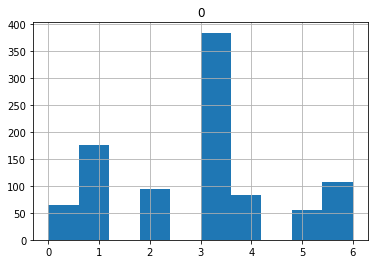

In [113]:
# Options:
# 1. Balance the classes
# 2. Tune algorithms. SVC and Logistic Regression
import pandas as pd
df_y = pd.DataFrame(y_train)
df_y.hist() # plot a histogram to see distribution

In [124]:
df = pd.DataFrame(Z_train)

df['y'] = y_train